# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
import pandas as pd
data = pd.read_excel('/home/jupyter-anhvu1995/hds5210-2022/final/Drinking_Water_Testing_Data_State_01-03-2022_0.xlsx', sheet_name = 'Data')
data.shape

(307492, 27)

In [2]:
data

,State,Region,County,PWSID,PWS Name,Population Served,Size,Cities Served,ZIP Codes Served,Sample ID,...,Concentration (ng/L),Detection Limit,Sample Date,Compliance Period Begin Date,Compliance Period End Date,Sample Type,MRL/MDL,Reporting,Comment,Samples
0,NC,4,"NEW HANOVER, NC",NC0465020,WRIGHTSVILLE BEACH WATER SYST,6380,Medium,WRIGHTSVILLE BEACH,-,NaN,...,2003.8,NaN,2019-05-29 00:00:00,-,-,NaN,-,Manual,NaN,1
1,CO,8,"EL PASO, CO",CO0121775,SECURITY WSD,20000,Large,-,-,CO0121775-022T,...,1596.9,NaN,2020-03-11 00:00:00,-,-,RW,-,Manual,NaN,1
2,CO,8,"EL PASO, CO",CO0121775,SECURITY WSD,20000,Large,-,-,CO0121775-022T,...,1006,NaN,2020-03-11 00:00:00,-,-,RW,-,Manual,NaN,1
3,CO,8,"EL PASO, CO",CO0121775,SECURITY WSD,20000,Large,-,-,CO0121775-006T,...,955.9,NaN,2020-03-11 00:00:00,-,-,RW,-,Manual,NaN,1
4,CO,8,"EL PASO, CO",CO0121775,SECURITY WSD,20000,Large,-,-,CO0121775-022T,...,940,9.1,2020-03-11 00:00:00,-,-,RW,-,Manual,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307487,WV,3,"MARSHALL, WV",WV3302611,MOUNDSVILLE,9911,Medium,MOUNDSVILLE,-,2779643,...,-,0.01 UG/L,2013-02-13 00:00:00,-,-,RT,MRL,Automated,-,1
307488,WV,3,"MARSHALL, WV",WV3302611,MOUNDSVILLE,9911,Medium,MOUNDSVILLE,-,2779643,...,-,0.03 UG/L,2013-02-13 00:00:00,-,-,RT,MRL,Automated,-,1
307489,WV,3,"MARSHALL, WV",WV3302611,MOUNDSVILLE,9911,Medium,MOUNDSVILLE,-,2779643,...,-,0.02 UG/L,2013-02-13 00:00:00,-,-,RT,MRL,Automated,-,1
307490,WV,3,"MARSHALL, WV",WV3302611,MOUNDSVILLE,9911,Medium,MOUNDSVILLE,-,2779643,...,-,0.04 UG/L,2013-02-13 00:00:00,-,-,RT,MRL,Automated,-,1


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [3]:
data.columns

Index(['State', 'Region', 'County', 'PWSID', 'PWS Name', 'Population Served',
       'Size', 'Cities Served', 'ZIP Codes Served', 'Sample ID',
       'Sample Point ID', 'Code', 'Contaminant', 'Detection Method',
       'Detected', 'Concentration', 'Units', 'Concentration (ng/L)',
       'Detection Limit', 'Sample Date', 'Compliance Period Begin Date',
       'Compliance Period End Date', 'Sample Type', 'MRL/MDL', 'Reporting',
       'Comment', 'Samples'],
      dtype='object')

In [4]:
data.nunique()


State                             20
Region                             9
County                           815
PWSID                           6846
PWS Name                        6794
Population Served               2336
Size                               6
Cities Served                   1714
ZIP Codes Served                 216
Sample ID                       8118
Sample Point ID                 3200
Code                              26
Contaminant                       67
Detection Method                  13
Detected                           3
Concentration                   3574
Units                              6
Concentration (ng/L)            2632
Detection Limit                  861
Sample Date                     1290
Compliance Period Begin Date       1
Compliance Period End Date         1
Sample Type                        8
MRL/MDL                           12
Reporting                          2
Comment                           22
Samples                           18
d

### Comment:
While 'Sample ID' would have the highest diversity, it is a ID code, and not every sample has an ID code (depending on the testing facility). Hence, the column with the highest diversity would be 'PWSID' which is the code for the testing company/contractor

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [20]:
repeated_entry_columns = [column for column in data.columns if data[column].nunique()==1]
repeated_entry_columns

['Compliance Period Begin Date', 'Compliance Period End Date']

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

In [27]:
no_na = data['Concentration (ng/L)'] == '-'
data = data[~no_na]

contaminant = data.groupby('Contaminant')
data['Concentration (ng/L)'] = pd.to_numeric(data['Concentration (ng/L)'])

contaminant['Concentration (ng/L)'].agg(['min','max','mean','median','std','count'])

,min,max,mean,median,std,count
Contaminant,,,,,,
10:2 FTSA,0.00,0.00,0.000000,0.000,0.000000,31
10:2 PFS,2.30,2.30,2.300000,2.300,NaN,1
11CL-PF3OUDS,0.00,89.00,1.784233,1.800,1.924131,5536
4:2 FTS,0.00,0.00,0.000000,0.000,0.000000,2
4:2 FTSA,0.00,18.60,0.315254,0.000,2.421514,59
6:2 FTS,1.10,12.60,4.371429,1.800,4.620142,7
6:2 FTSA,0.00,35.00,0.829690,0.000,4.192506,129
8:2 FTSA,0.00,0.00,0.000000,0.000,0.000000,123
9CL-PF3ONS,0.00,89.00,1.769781,1.800,1.930139,5534


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe138c776a0>]],
      dtype=object)

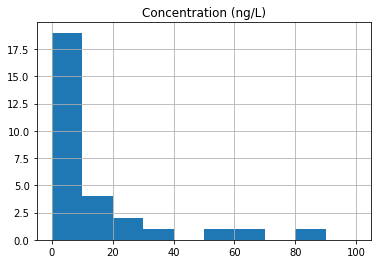

In [39]:
contaminant.agg({'Concentration (ng/L)' : 'sum'}).hist(range = [0,100])

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)



---



## Submitting Your Work

Submit your work as usual.